# import the needed liberaries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

import numpy as np
from sklearn.model_selection import train_test_split=

# get the data set

In [2]:
df = pd.read_csv('healthcare_dataset.csv')

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,10/9/2022,Penicillin,Abnormal


## Identify missing values and deal with them

In [4]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# Remove unneeded features

In [5]:
# Commented out features are the extracted ones
df = df.drop(columns=[
                      'Name', 
                      # 'Age',
                      # 'Gender',
                      # 'Blood Type',
                      # 'Medical Condition',
                      'Date of Admission',
                      'Doctor', 
                      'Hospital', 
                      'Insurance Provider',
                      # 'Billing Amount',
                      # 'Room Number', 
                      # 'Admission Type', 
                      'Discharge Date',
                      # 'Medication', 
                      ])

# Encode Catagorical Data

In [6]:
# Features and target
X = df.drop(columns=["Test Results"])
y = df["Test Results"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)

       Age  Gender Blood Type Medical Condition  Billing Amount  Room Number  \
45174   22  Female         O+         Arthritis    42298.681572          336   
10214   22    Male         B-          Diabetes     2437.435883          486   
43199   81  Female         A+         Arthritis     5600.450992          392   
31626   80  Female         B+            Asthma    39533.300775          225   
9273    26  Female        AB+           Obesity    37691.176763          279   
...    ...     ...        ...               ...             ...          ...   
44732   27  Female         B-            Cancer    28005.689380          358   
54343   32    Male        AB-      Hypertension     2381.539677          213   
38158   24  Female         B-           Obesity    10502.693983          420   
860     76    Male         A+            Asthma    13014.330000          108   
15795   33  Female         B+           Obesity    31483.462072          303   

      Admission Type   Medication  
451

#### Encode X

In [7]:
# Identify columns
numeric_cols = [
  "Age", 
  "Billing Amount",
  # "Room Number"
]
categorical_cols = X.columns.drop(numeric_cols).tolist()

# ColumnTransformer: correct encoding
ct = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

# Fit/transform
X_train_processed = ct.fit_transform(X_train)
X_test_processed = ct.transform(X_test)

#### Encode y

In [10]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Training The KNN Regressor Model

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

knr = KNeighborsRegressor(n_neighbors=11)
knr.fit(X_train_processed, y_train_encoded)

# Predict
y_pred = knr.predict(X_test_processed)
y_pred_rounded = np.round(y_pred).astype(int)

y_pred_rounded = np.clip(
    y_pred_rounded,
    y_test_encoded.min(),
    y_test_encoded.max()
)
y_pred_labels = le.inverse_transform(y_pred_rounded)
y_test_labels = le.inverse_transform(y_test_encoded)


# Metrics for regression
print("R2 Score:", r2_score(y_test_encoded, y_pred))
print("RMSE: ", root_mean_squared_error(y_test_encoded, y_pred))
# print("MSE:", mean_squared_error(y_test, y_pred))
print("\n")

print("First 10 Actual vs Predicted Charges values:")
print("============================================")
for i in range(10):
    print(f"\nActual: {y_test.iloc[i]}  |  Predicted: {y_pred_labels[i]}")

# Accuracy
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_rounded))
# print("Classification Report\n", classification_report(y_test, y_pred))

# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay

# ConfusionMatrixDisplay.from_predictions(
#     y_test,
#     y_pred
# )
# plt.title("Confusion Matrix")
# plt.show()


R2 Score: -0.07359084386551418
RMSE:  0.8507347028648976


First 10 Actual vs Predicted Charges values:

Actual: Inconclusive  |  Predicted: Inconclusive

Actual: Abnormal  |  Predicted: Inconclusive

Actual: Inconclusive  |  Predicted: Inconclusive

Actual: Abnormal  |  Predicted: Inconclusive

Actual: Inconclusive  |  Predicted: Inconclusive

Actual: Abnormal  |  Predicted: Inconclusive

Actual: Inconclusive  |  Predicted: Inconclusive

Actual: Abnormal  |  Predicted: Inconclusive

Actual: Inconclusive  |  Predicted: Inconclusive

Actual: Normal  |  Predicted: Inconclusive
Accuracy: 0.32981981981981984


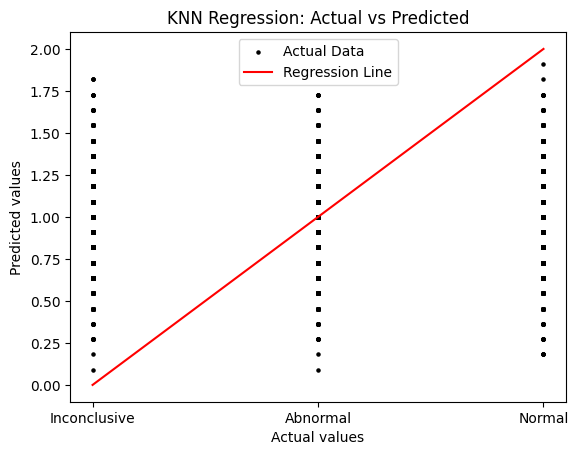

In [19]:
plt.figure()
plt.scatter(y_test, y_pred, s=5, label="Actual Data", color='black')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("KNN Regression: Actual vs Predicted")


min_val = min(y_test_encoded.min(), y_pred.min())
max_val = max(y_test_encoded.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], label="Regression Line", color='red')

plt.legend()
plt.show()

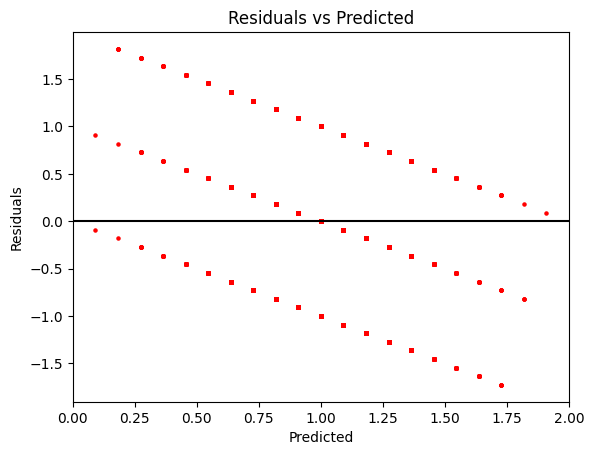

In [20]:
residuals = y_test_encoded - y_pred

plt.figure()
plt.scatter(y_pred, residuals, s=5, color='red')
plt.axhline(0, color='black')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()